<a href="https://colab.research.google.com/github/hanGtz92/diabetes/blob/main/UNI_Clasificacion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

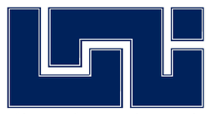

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks

[UNI-DEPEC](https://posgrado.uni.edu.ni)

<h1><b>
Clasificación

## Carga de librerías necesarias

In [ ]:
import pandas as pd #para la creación del dataframe y limpieza de los datos
import sklearn #para los algoritmos de aprendizaje automático
import sklearn.metrics as metrics #para la medición de los algoritmos
import matplotlib.pyplot as plt #librería gráfica básica
import pickle #para grabar y recuperar los modelos entrenados
import os

## Ingeniería de las características de los Datos

### Extracción de Datos - Creación del DataFrame

In [ ]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/UNI/main/"

In [ ]:
archivo = "clientes.csv"

In [ ]:
clientes = pd.read_csv(url+archivo) #los datos están separados por comas
clientes = clientes.drop(columns="Unnamed: 0")
clientes #vista del dataframe

,ID,Trabajo,Edad,Salario,Compra
0,0,1,19,19000,No
1,1,1,35,20000,No
2,2,0,26,43000,No
3,3,0,27,57000,No
4,4,1,19,76000,No
...,...,...,...,...,...
395,395,0,46,41000,Si
396,396,1,51,23000,Si
397,397,0,50,20000,Si
398,398,1,36,33000,No


El dataframe contiene 5 variables y 400 observaciones.

Las variables indican:
- **ID:** La identificación del cliente
- **Trabajo:** Corresponde 1 cuando es Dependiente y 0 cuando es Independiente
- **Edad:** La edad del cliente
- **Salario:** El salario estimado del cliente
- **Compra:** Si, cuando el cliente ha comprado y no cuando no lo ha hecho.

El problema a resolver es con los datos historicos (entrenamiento) predecir en virtud de las variables independientes, si un cliente va a efectuar una compra.

### Selección de características

In [ ]:
clientes.info() #visualizacion de los tipos de datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       400 non-null    int64 
 1   Trabajo  400 non-null    int64 
 2   Edad     400 non-null    int64 
 3   Salario  400 non-null    int64 
 4   Compra   400 non-null    object
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Podemos constatar que no hay valores nulos, ya que todas las columnas tienen la misma cantidad de datos, pero lo que no podemos constatar es si hay valores duplicados...

Ahora vamos a eliminar la variable o columna que no es pertinente para el problema planteado...

In [ ]:
clientes.drop_duplicates(inplace=True)
clientes.shape

(400, 5)

In [ ]:
clientes = clientes.drop(columns=["ID"]) #se elimina la variable no relevante
clientes #vista del dataframe

,Trabajo,Edad,Salario,Compra
0,1,19,19000,No
1,1,35,20000,No
2,0,26,43000,No
3,0,27,57000,No
4,1,19,76000,No
...,...,...,...,...
395,0,46,41000,Si
396,1,51,23000,Si
397,0,50,20000,Si
398,1,36,33000,No


## División del dataframe

Primero se divide el dataframe en variable objetivo $y$ con la columna que contiene los datos etiquetados por un lado, y en vector de entrada de los datos $X=$ con las variables restantes (variables independientes). 

In [ ]:
y = clientes["Compra"] #se define la variable objetivo
X = clientes.drop(columns=["Compra"]) #se elimina la variable objetivo del vector de entrada

In [ ]:
y #visualizando la variable objetivo

0      No
1      No
2      No
3      No
4      No
       ..
395    Si
396    Si
397    Si
398    No
399    Si
Name: Compra, Length: 400, dtype: object

In [ ]:
X #visualizando el vector de entrada

,Trabajo,Edad,Salario
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


Ahora se divide la variable objetivo $y$ en un conjunto de datos de entrenamiento (train) y prueba (test). Lo mismo se realiza para el vector de entrada de los datos $X$.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

La proporcion es 75% para entrenamiento y 25% para prueba

In [ ]:
X_train.shape

(300, 3)

De las 400 observaciones del vector de entrada de datos, 300 observaciones son de entrenamiento

In [ ]:
X_test.shape

(100, 3)

De las 400 observaciones del vector de entrada de datos, 100 observaciones son de prueba

In [ ]:
y_train.shape

(300,)

De las 400 observaciones de la variable objetivo, 300 observaciones son de entrenamiento

In [ ]:
y_test.shape

(100,)

De las 400 observaciones de la variable objetivo, 100 observaciones son de prueba

## Escala del vector de entrada

In [ ]:
#from sklearn.preprocessing import StandardScaler

In [ ]:
#normalizacion = StandardScaler()

In [ ]:
#X_train = normalizacion.fit_transform(X_train)
#X_test = normalizacion.transform(X_test)

# Evaluando los Algoritmos

## Algoritmo Árbol de Decisión

In [ ]:
from sklearn import tree

In [ ]:
ad = sklearn.tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=2)

In [ ]:
ad.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=100)

In [ ]:
y_pred_ad = ad.predict(X_test)

In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred_ad)
print(mc)

[[64  4]
 [ 2 30]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


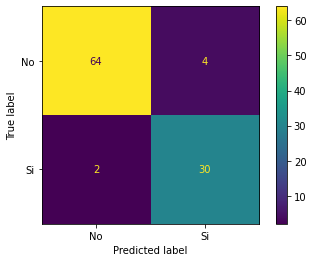

In [ ]:
metrics.plot_confusion_matrix(ad,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


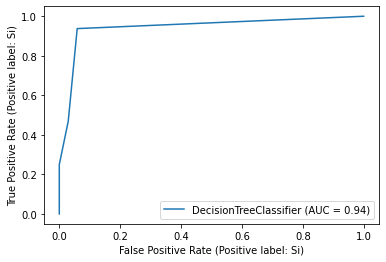

In [ ]:
metrics.plot_roc_curve(ad, X_test, y_test)

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_ad)
print(reporte)

              precision    recall  f1-score   support

          No       0.97      0.94      0.96        68
          Si       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


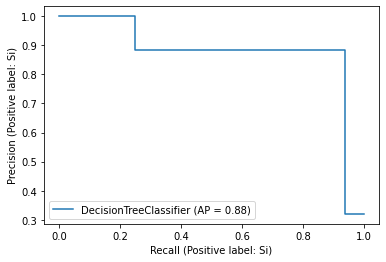

In [ ]:
metrics.plot_precision_recall_curve(ad,X_test,y_test)

### Guardando el modelo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_arbol_decision.pkl"

In [ ]:
file = open(path, "wb")
pickle.dump(ad, file)

### Leyendo el modelo

In [ ]:
file = open(path, "rb")
modelo_ad = pickle.load(file)

### Visualización Árbol de Decisión

In [ ]:
variables = ["Trabajo","Edad","Salario"]
compra = ["No","Si"]

[Text(223.2, 362.4, 'Edad <= 44.5\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]\nclass = No'),
 Text(111.6, 217.44, 'Salario <= 90500.0\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]\nclass = No'),
 Text(55.8, 72.47999999999996, 'entropy = 0.241\nsamples = 176\nvalue = [169, 7]\nclass = No'),
 Text(167.39999999999998, 72.47999999999996, 'entropy = 0.619\nsamples = 39\nvalue = [6, 33]\nclass = Si'),
 Text(334.79999999999995, 217.44, 'Salario <= 41500.0\nentropy = 0.645\nsamples = 85\nvalue = [14, 71]\nclass = Si'),
 Text(279.0, 72.47999999999996, 'entropy = 0.211\nsamples = 30\nvalue = [1, 29]\nclass = Si'),
 Text(390.59999999999997, 72.47999999999996, 'entropy = 0.789\nsamples = 55\nvalue = [13, 42]\nclass = Si')]

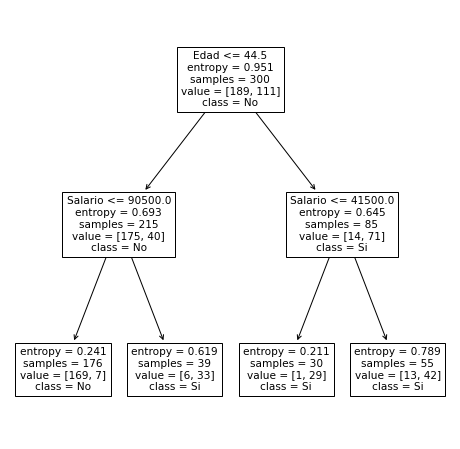

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(modelo_ad, feature_names = variables, class_names= compra, ax=ax)

### Predicción

In [ ]:
prediccion_ad = modelo_ad.predict([[1,24,19000],[0,24,91000],[1,45,19000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(prediccion_ad)

['No' 'Si' 'Si']


In [ ]:
X_test

,Trabajo,Edad,Salario
132,1,30,87000
309,0,38,50000
341,1,35,75000
196,0,30,79000
246,0,35,50000
...,...,...,...
146,0,27,96000
135,1,23,63000
390,1,48,33000
264,1,48,90000


In [ ]:
prediccion_ad_2 = modelo_ad.predict(X_test)

In [ ]:
print(prediccion_ad_2)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No'
 'No' 'Si' 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'No'
 'No' 'No' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'No' 'No'
 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'Si'
 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No'
 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'No'
 'Si' 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'Si' 'No' 'Si'
 'Si' 'Si']


![UNI](https://posgrado.uni.edu.ni/wp-content/uploads/2017/02/logo_opt-2.png)